In [1]:
#This code will access drive from collab since the dataset is stored in drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Defining the file path to the dataset created
train_dir = '/content/drive/MyDrive/TN'  #file path
test_dir = '/content/drive/MyDrive/TS'    #file path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/TN/Penguins')))
print(len(os.listdir('/content/drive/MyDrive/TN/Puffins')))
print(len(os.listdir('/content/drive/MyDrive/TS/Penguins')))
print(len(os.listdir('/content/drive/MyDrive/TS/Puffins')))

500
448
500
448


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator for the Training (TN) set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Splitting 20% of the images for validation
)

#Preparing and loading the training (TN) data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  #Binary selected for Penguins and Puffins
    subset='training'  #Training specified for the TN set
)

#Image Data Generator for the Validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Splitting 20% of the images for validation
)

#Preparing and loading the Validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  #Validation specified for validation set
)


Found 759 images belonging to 2 classes.
Found 189 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout


In [7]:
#Developing the Convolutional Neural Network model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#To reduce overfitting, the top and below code is added with "model.add(BatchNormalization())" was added
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#To reduce overfitting, the top and below code is added with "model.add(BatchNormalization())" was added
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#To reduce overfitting, the top and below code is added with "model.add(BatchNormalization())" was added
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #Reduction of features
#To reduce overfitting, the top and below code is added with "model.add(Dropout(0.1))" was added
model.add(Dense(64,activation='relu'))
#To reduce overfitting, the top and below code is added with "model.add(Dropout(0.1))" was added
model.add(Dense(1,activation='sigmoid'))  #This will be the output layer


In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #Binary-crossentropy means binary classification


In [9]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
24/24 [==============================] - 242s 10s/step - loss: 0.5107 - accuracy: 0.7984 - val_loss: 0.2208 - val_accuracy: 0.9153
Epoch 2/30
24/24 [==============================] - 124s 5s/step - loss: 0.2480 - accuracy: 0.8986 - val_loss: 0.2406 - val_accuracy: 0.8995
Epoch 3/30
24/24 [==============================] - 117s 5s/step - loss: 0.1575 - accuracy: 0.9368 - val_loss: 0.2007 - val_accuracy: 0.9206
Epoch 4/30
24/24 [==============================] - 117s 5s/step - loss: 0.0882 - accuracy: 0.9684 - val_loss: 0.1700 - val_accuracy: 0.9259
Epoch 5/30
24/24 [==============================] - 115s 5s/step - loss: 0.0463 - accuracy: 0.9842 - val_loss: 0.1522 - val_accuracy: 0.9312
Epoch 6/30
24/24 [==============================] - 117s 5s/step - loss: 0.0431 - accuracy: 0.9816 - val_loss: 0.2256 - val_accuracy: 0.9259
Epoch 7/30
24/24 [==============================] - 126s 5s/step - loss: 0.0230 - accuracy: 0.9974 - val_loss: 0.1869 - val_accuracy: 0.9365
Epoch 8/30
2

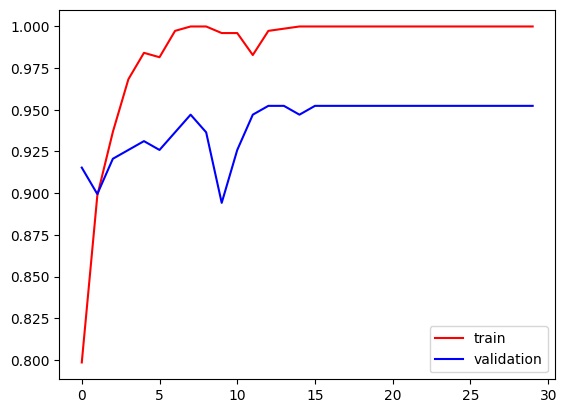

In [10]:
#Creating the accuracy graph of train and validation
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


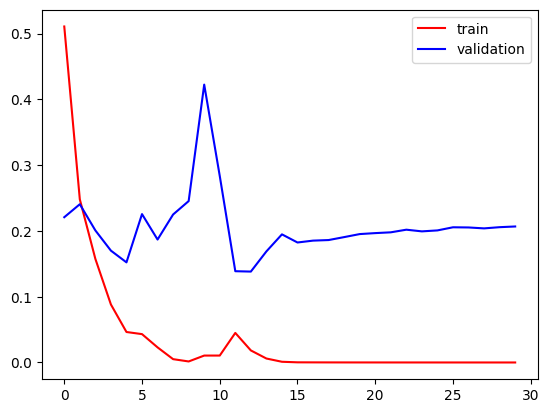

In [11]:
#Creating the loss graph of train and validation
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)


Found 948 images belonging to 2 classes.


In [13]:
#Test data prediction code
predictions = model.predict(test_data)
print(predictions)


30/30 [==============================] - 195s 7s/step
[[1.00000000e+00]
 [5.22684229e-10]
 [2.32697195e-12]
 [1.00000000e+00]
 [9.74451422e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.39235312e-08]
 [3.38738434e-12]
 [9.79138104e-10]
 [1.69624384e-10]
 [1.93892173e-08]
 [9.99977767e-01]
 [1.05955607e-07]
 [1.78384642e-18]
 [9.60260749e-01]
 [9.99802172e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999881e-01]
 [3.58661723e-09]
 [1.11886930e-05]
 [1.74388406e-10]
 [1.38274727e-18]
 [3.10384121e-06]
 [1.21146087e-07]
 [1.00000000e+00]
 [9.99676108e-01]
 [1.60473264e-05]
 [4.17218304e-09]
 [9.42588159e-08]
 [4.71392013e-06]
 [5.30653133e-10]
 [9.99999940e-01]
 [9.54851329e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.05608256e-11]
 [1.98829699e-08]
 [1.65183058e-12]
 [9.99998748e-01]
 [9.99997795e-01]
 [9.99999940e-01]
 [9.99892056e-01]
 [3.73247717e-11]
 [8.50047532e-10]
 [1.14826200e-07]
 [9.99999404e-01]
 [1.00000000e+00]
 [1.000000

In [14]:
len(predictions)

948

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

#The true_labels are assumed as Ground Truth Label and predicted_labels as Predicted Labels.
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  #Threshold is 0.5

#Confusion matrix calculation code
cm = confusion_matrix(true_labels, predicted_labels)

#Confusion matrix print code
print("Confusion Matrix:")
print(cm)

#Classsification report print code
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


Confusion Matrix:
[[272 228]
 [231 217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       500
           1       0.49      0.48      0.49       448

    accuracy                           0.52       948
   macro avg       0.51      0.51      0.51       948
weighted avg       0.52      0.52      0.52       948



In [16]:
#Defining the file path to the dataset created
train_dir = '/content/drive/MyDrive/TN'  #file path
test_dir = '/content/drive/MyDrive/TS'    #file path

In [17]:
import os
print(len(os.listdir('/content/drive/MyDrive/TN/Penguins')))
print(len(os.listdir('/content/drive/MyDrive/TN/Puffins')))
print(len(os.listdir('/content/drive/MyDrive/TS/Penguins')))
print(len(os.listdir('/content/drive/MyDrive/TS/Puffins')))

500
448
500
448


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Image Data Generator for the Training (TN) set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Splitting 20% of the images for validation
)

#Preparing and loading the training (TN) data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  #Binary selected for Penguins and Puffins
    subset='training'  #Training specified for the TN set
)

#Image Data Generator for the Validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Splitting 20% of the images for validation
)

#Preparing and loading the Validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  #Validation specified for validation set
)


Found 759 images belonging to 2 classes.
Found 189 images belonging to 2 classes.


In [19]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #The Pre-trained model is ResNet50
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #Since all the layers in ResNet50 is not trainable so here to keep the weights, custom I/P and other layers have been added

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))


94765736/94765736 [==============================] - 1s 0us/step


In [20]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [21]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #Binary-crossentropy means binary classification


In [22]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
24/24 [==============================] - 242s 10s/step - loss: 1.7655 - accuracy: 0.5982 - val_loss: 0.4966 - val_accuracy: 0.7143
Epoch 2/3
24/24 [==============================] - 234s 10s/step - loss: 0.4438 - accuracy: 0.7984 - val_loss: 0.3831 - val_accuracy: 0.8783
Epoch 3/3
24/24 [==============================] - 271s 11s/step - loss: 0.3530 - accuracy: 0.8630 - val_loss: 0.3201 - val_accuracy: 0.9206


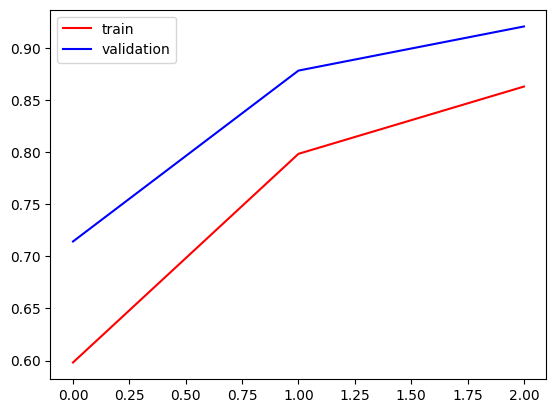

In [23]:
#Creating the accuracy graph of train and validation
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


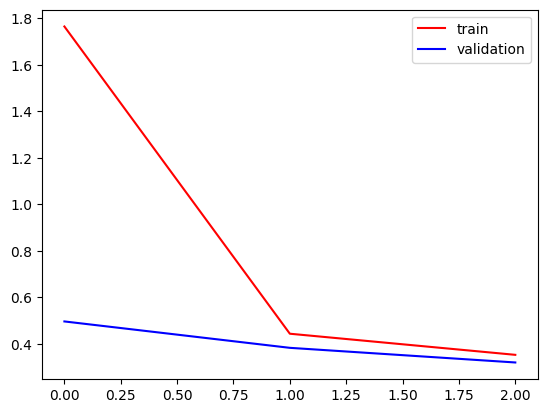

In [24]:
#Creating the loss graph of train and validation
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [25]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)


Found 948 images belonging to 2 classes.


In [26]:
#Test data prediction code
predictions = resnet_model.predict(test_data)
print(predictions)


30/30 [==============================] - 249s 8s/step
[[2.63270915e-01]
 [6.40602827e-01]
 [7.58003490e-03]
 [4.10572365e-02]
 [7.90405750e-01]
 [8.40663791e-01]
 [7.68728554e-01]
 [8.24780941e-01]
 [8.89862120e-01]
 [2.57908279e-04]
 [6.97127104e-01]
 [7.61832297e-01]
 [1.47506979e-03]
 [2.46150419e-03]
 [6.01903498e-02]
 [3.85577351e-01]
 [1.28310798e-02]
 [6.59033418e-01]
 [8.25109124e-01]
 [6.48572981e-01]
 [2.91670471e-01]
 [2.57654756e-01]
 [6.47962689e-02]
 [4.53918427e-01]
 [6.83544219e-01]
 [7.91324005e-02]
 [8.00978124e-01]
 [5.17802965e-03]
 [4.46383870e-04]
 [3.14258277e-01]
 [6.66708767e-01]
 [5.37141263e-01]
 [7.63804555e-01]
 [8.64494145e-01]
 [6.84905708e-01]
 [4.03093826e-03]
 [7.37973630e-01]
 [9.16395783e-01]
 [3.53849930e-04]
 [1.04374938e-01]
 [7.62576342e-01]
 [5.56503415e-01]
 [8.34061444e-01]
 [8.31333876e-01]
 [6.71297252e-01]
 [3.54600191e-01]
 [8.12569499e-01]
 [3.03631276e-01]
 [3.52387369e-01]
 [7.24106848e-01]
 [9.73939225e-02]
 [9.12437975e-01]
 [7.981868

In [27]:
len(predictions)

948

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

#The true_labels are assumed as Ground Truth Label and predicted_labels as Predicted Labels.
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  #Threshold is 0.5

#Confusion matrix calculation code
cm = confusion_matrix(true_labels, predicted_labels)

#Confusion matrix print code
print("Confusion Matrix:")
print(cm)

#Classsification report print code
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


Confusion Matrix:
[[245 255]
 [225 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       500
           1       0.47      0.50      0.48       448

    accuracy                           0.49       948
   macro avg       0.49      0.49      0.49       948
weighted avg       0.50      0.49      0.49       948

